# Stochastic computation graph

Ref. 

J. Scheulman, N. Heess, T. Weber, and P. Abbeel, Gradient Estimation Using Stochastic Computation Graphs

http://www.nowozin.net/sebastian/blog/stochastic-computation-graphs.html


## Example

\begin{equation}
F(\theta) = \mathbb{E}_{y \sim x(\theta)} [f(y)]
\end{equation}

for a case, $x(\theta) = (\theta - 1)^2$, $y(x) \sim \mathcal{N} (x, 1)$, $f(y) = \left( y - \frac{5}{2}\right)^2$

이 문제의 경우 기대값을 다음과 같이 구할 수 있다. 

$F(\theta) = ((\theta -1)^2 - \frac{5}{2})^2 + 1$

혹은 sympy를 통하여 평가해 볼 수도 있다.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sympy import *

%matplotlib inline

### 참고. Sympy를 이용한 기대값 계산

In [3]:
x, y, th = symbols(['x', 'y', 'th'])
f = 1 / sqrt(2 * pi) * exp(-1 / 2 * (y - (th - 1) ** 2) ** 2) * (y - 5 / 2) ** 2
f

3.125*sqrt(2)*(0.4*y - 1)**2*exp(-0.5*(y - (th - 1)**2)**2)/sqrt(pi)

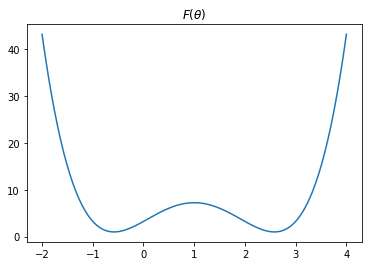

In [8]:
r = integrate(f, (y, -oo, oo))
theta = np.linspace(-2, 4, 100)
dfsym = map(lambda th_v: r.subs([(th, th_v)]).evalf(), theta)
dfsym = map(lambda x: float(x), dfsym)
dfsym = list(dfsym)
sns.lineplot(x=theta, y=dfsym)
plt.title(r'$F(\theta)$');

Text(0.5, 1.0, '$\\frac{\\partial F(\\theta)}{\\partial \\theta}}$')

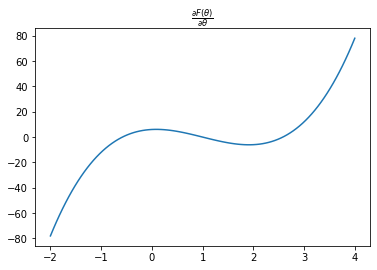

In [12]:
dr = diff(r, [th, 1])
theta = np.linspace(-2, 4, 100)
ddfsym = map(lambda th_v: dr.subs([(th, th_v)]).evalf(), theta)
ddfsym = map(lambda x: float(x), ddfsym)
ddfsym = list(ddfsym)
sns.lineplot(x=theta, y=ddfsym)
plt.title(r'$\frac{\partial F(\theta)}{\partial \theta}}$');

## 기댓값 평가

In [13]:
theta = np.linspace(-2, 4, 100)
F = (theta - 1)**2 - 5/2
F = F**2 + 1

In [14]:
dF = 4 * (theta - 1) * ((theta - 1) ** 2 - 5 / 2)

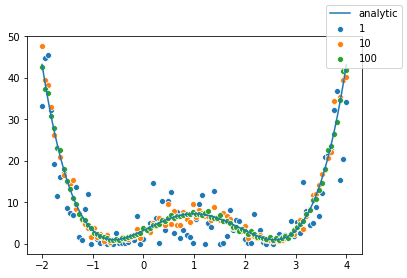

In [17]:
def est(n_samples):
    f = []
    for th in theta:
        y = np.random.normal(loc=(th - 1)**2, size=n_samples)
        sf = (y - 5/2) ** 2
        f.append(sf.mean())
        
    return f
    
fig, ax = plt.subplots()
sns.lineplot(x=theta, y=F, ax=ax)
sns.scatterplot(x=theta, y=est(1), ax=ax)
sns.scatterplot(x=theta, y=est(10), ax=ax)
sns.scatterplot(x=theta, y=est(100), ax=ax)
fig.legend(labels=['analytic', '1', '10', '100']);

## 기댓값 도함수

\begin{equation}
\mathbb{E}_y \left[ 2 (\theta - 1) (y - x(\theta)) f(y) \right]
\end{equation}

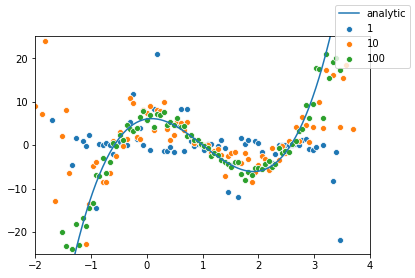

In [18]:
def grad_est(n_samples):
    df = []
    for th in theta:
        y = np.random.normal(loc=(th - 1)**2, size=n_samples)
        x = (th - 1) ** 2
        sdf = 2 * (th - 1) * (y - x) * (y - 5/2) ** 2
        df.append(sdf.mean())
        
    return df


fig, ax = plt.subplots()
ax.set_xlim(-2, 4)
ax.set_ylim(-25, 25)
sns.lineplot(x=theta, y=dF, ax=ax)
sns.scatterplot(x=theta, y=grad_est(1), ax=ax)
sns.scatterplot(x=theta, y=grad_est(10), ax=ax)
sns.scatterplot(x=theta, y=grad_est(100), ax=ax)
fig.legend(labels=['analytic', '1', '10', '100']);

## 관찰

* 기댓값의 도함수는 분산이 크다. 